#**Necessary packages and libraries import**

In [108]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

#**Model importing**

In [74]:
eth = pd.read_csv('/content/transaction_dataset.csv')
eth.head()

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [75]:
eth['FLAG'].unique()

array([0, 1])

In [76]:
eth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 51 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Unnamed: 0                                            9841 non-null   int64  
 1   Index                                                 9841 non-null   int64  
 2   Address                                               9841 non-null   object 
 3   FLAG                                                  9841 non-null   int64  
 4   Avg min between sent tnx                              9841 non-null   float64
 5   Avg min between received tnx                          9841 non-null   float64
 6   Time Diff between first and last (Mins)               9841 non-null   float64
 7   Sent tnx                                              9841 non-null   int64  
 8   Received Tnx                                          9841

#**removing the unnecessay columns**

In [77]:
columns = [
    'FLAG',
    'Avg min between sent tnx',
    'Avg min between received tnx',
    'Sent tnx',
    'Received Tnx',
    'Unique Received From Addresses',
    'Unique Sent To Addresses',
    'avg val received',
    'avg val sent',
    'avg value sent to contract',
    'total transactions (including tnx to create contract',
    'total Ether sent',
    'total ether received',
    'total ether sent contracts',
    ' Total ERC20 tnxs',
    ' ERC20 total Ether received'
]

eth_new = eth[columns]

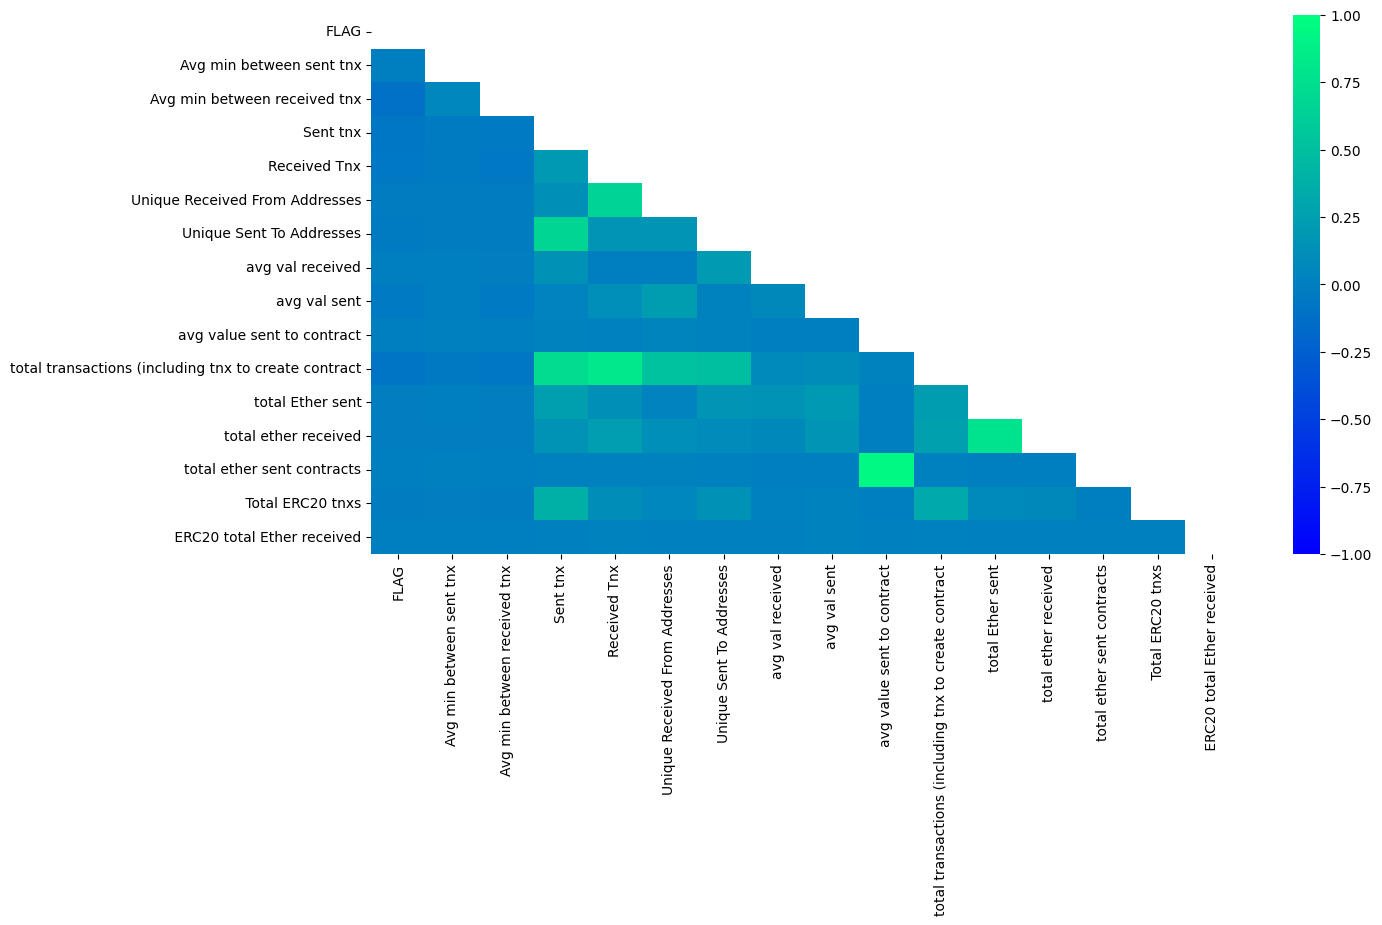

In [111]:
plt.figure(figsize=(14, 7))
numeric = eth_new.select_dtypes(include=['number']).columns
corr = eth_new[numeric].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot=False, vmin=-1, vmax=1, cmap='winter')
plt.show()

In [78]:
eth_new.head()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Sent tnx,Received Tnx,Unique Received From Addresses,Unique Sent To Addresses,avg val received,avg val sent,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,Total ERC20 tnxs,ERC20 total Ether received
0,0,844.26,1093.71,721,89,40,118,6.589513,1.200681,0.0,810,865.691093,586.466675,0.0,265.0,3.558854e+07
1,0,12709.07,2958.44,94,8,5,14,0.385685,0.032844,0.0,102,3.087297,3.085478,0.0,8.0,4.034283e+02
2,0,246194.54,2434.02,2,10,10,2,0.358906,1.794308,0.0,12,3.588616,3.589057,0.0,8.0,5.215121e+02
3,0,10219.60,15785.09,25,9,7,13,99.488840,70.001834,0.0,34,1750.045862,895.399559,0.0,14.0,1.711105e+04
4,0,36.61,10707.77,4598,20,7,19,2.671095,0.022688,0.0,4619,104.318883,53.421897,0.0,42.0,1.628297e+05


#**Dropping the null values**

In [79]:
eth_new.dropna(subset=[
    'Avg min between sent tnx',
    'Avg min between received tnx',
    'Sent tnx',
    'Received Tnx',
    'Unique Received From Addresses',
    'Unique Sent To Addresses',
    'avg val received',
    'avg val sent',
    'avg value sent to contract',
    'total transactions (including tnx to create contract',
    'total Ether sent',
    'total ether received',
    'total ether sent contracts',
    ' Total ERC20 tnxs',
    ' ERC20 total Ether received'
], inplace=True)

/tmp/ipython-input-2604013108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eth_new.dropna(subset=[


#**Marking Independent columns**

In [80]:
X = eth_new.drop('FLAG', axis=1)
y = eth_new['FLAG']

#**train_test_split the dataframe**

In [81]:
trainx, testx, trainy, testy = train_test_split(X, y, random_state = 42, test_size=0.2)

#**Implementing PowerTransformer to Normalize the values**

In [82]:
PT = PowerTransformer()
trainx = PT.fit_transform(trainx)
testx = PT.transform(testx)

#**Model Training**

#**LogisticRegression**

In [84]:
LR = LogisticRegression()
LR.fit(trainx, trainy)

LR_pred_val = LR.predict(testx)

accuracy_score(testy, LR_pred_val)

0.940099833610649

In [85]:
print(classification_report(testy, LR_pred_val))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1561
           1       0.78      0.77      0.78       242

    accuracy                           0.94      1803
   macro avg       0.87      0.87      0.87      1803
weighted avg       0.94      0.94      0.94      1803



#**KNeighborsClassifier**

In [91]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(trainx, trainy)

KNN_pred_val = KNN.predict(testx)

accuracy_score(testy, KNN_pred_val)

0.9739323349972269

In [87]:
print(classification_report(testy, KNN_pred_val))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1561
           1       0.93      0.87      0.90       242

    accuracy                           0.97      1803
   macro avg       0.95      0.93      0.94      1803
weighted avg       0.97      0.97      0.97      1803



#**SVC**

In [92]:
SVC = SVC()
SVC.fit(trainx, trainy)

SVC_pred_val = SVC.predict(testx)

accuracy_score(SVC_pred_val, testy)

0.9761508596783139

In [93]:
print(classification_report(testy, SVC_pred_val))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1561
           1       0.92      0.90      0.91       242

    accuracy                           0.98      1803
   macro avg       0.95      0.94      0.95      1803
weighted avg       0.98      0.98      0.98      1803



#**DecisionTreeClassifier**

In [95]:
DTC = DecisionTreeClassifier()
DTC.fit(trainx, trainy)

DTC_pred_val = DTC.predict(testx)

accuracy_score(testy, DTC_pred_val)

0.9661674986134221

In [96]:
print(classification_report(testy, DTC_pred_val))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1561
           1       0.86      0.89      0.88       242

    accuracy                           0.97      1803
   macro avg       0.92      0.93      0.93      1803
weighted avg       0.97      0.97      0.97      1803



#**RandomForestClassifier**

In [98]:
RFC = RandomForestClassifier()
RFC.fit(trainx, trainy)

RFC_pred_val = RFC.predict(testx)

accuracy_score(testy, RFC_pred_val)

0.9811425402107599

In [99]:
print(classification_report(testy, RFC_pred_val))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1561
           1       0.97      0.88      0.93       242

    accuracy                           0.98      1803
   macro avg       0.98      0.94      0.96      1803
weighted avg       0.98      0.98      0.98      1803



#**XGBClassifier**

In [100]:
XGBC = XGBClassifier()
XGBC.fit(trainx, trainy)

XGBC_pred_val = XGBC.predict(testx)

accuracy_score(testy, XGBC_pred_val)

0.9822518025513034

In [101]:
print(classification_report(testy, XGBC_pred_val))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1561
           1       0.95      0.91      0.93       242

    accuracy                           0.98      1803
   macro avg       0.97      0.95      0.96      1803
weighted avg       0.98      0.98      0.98      1803

